<a href="https://colab.research.google.com/github/shsaniya04/Machine-Learning-Projects/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Real_Estate.csv')

In [ ]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [ ]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [ ]:
df.shape

(414, 7)

In [ ]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:
print(df.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [ ]:
x = df.drop(['Transaction date','House price of unit area'], axis=1)
y = df['House price of unit area']
df1 = df.drop('Transaction date',axis = 1)

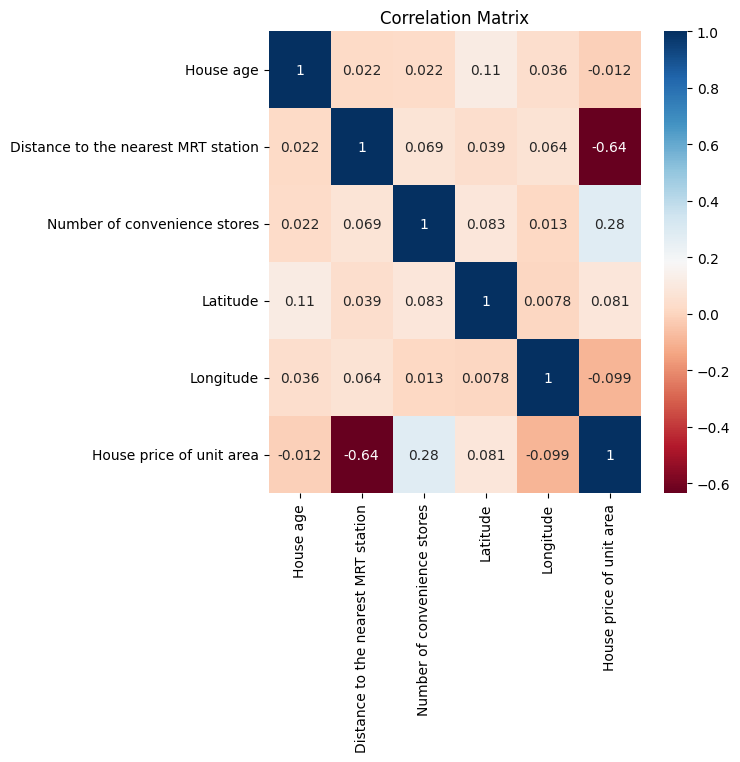

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df1.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

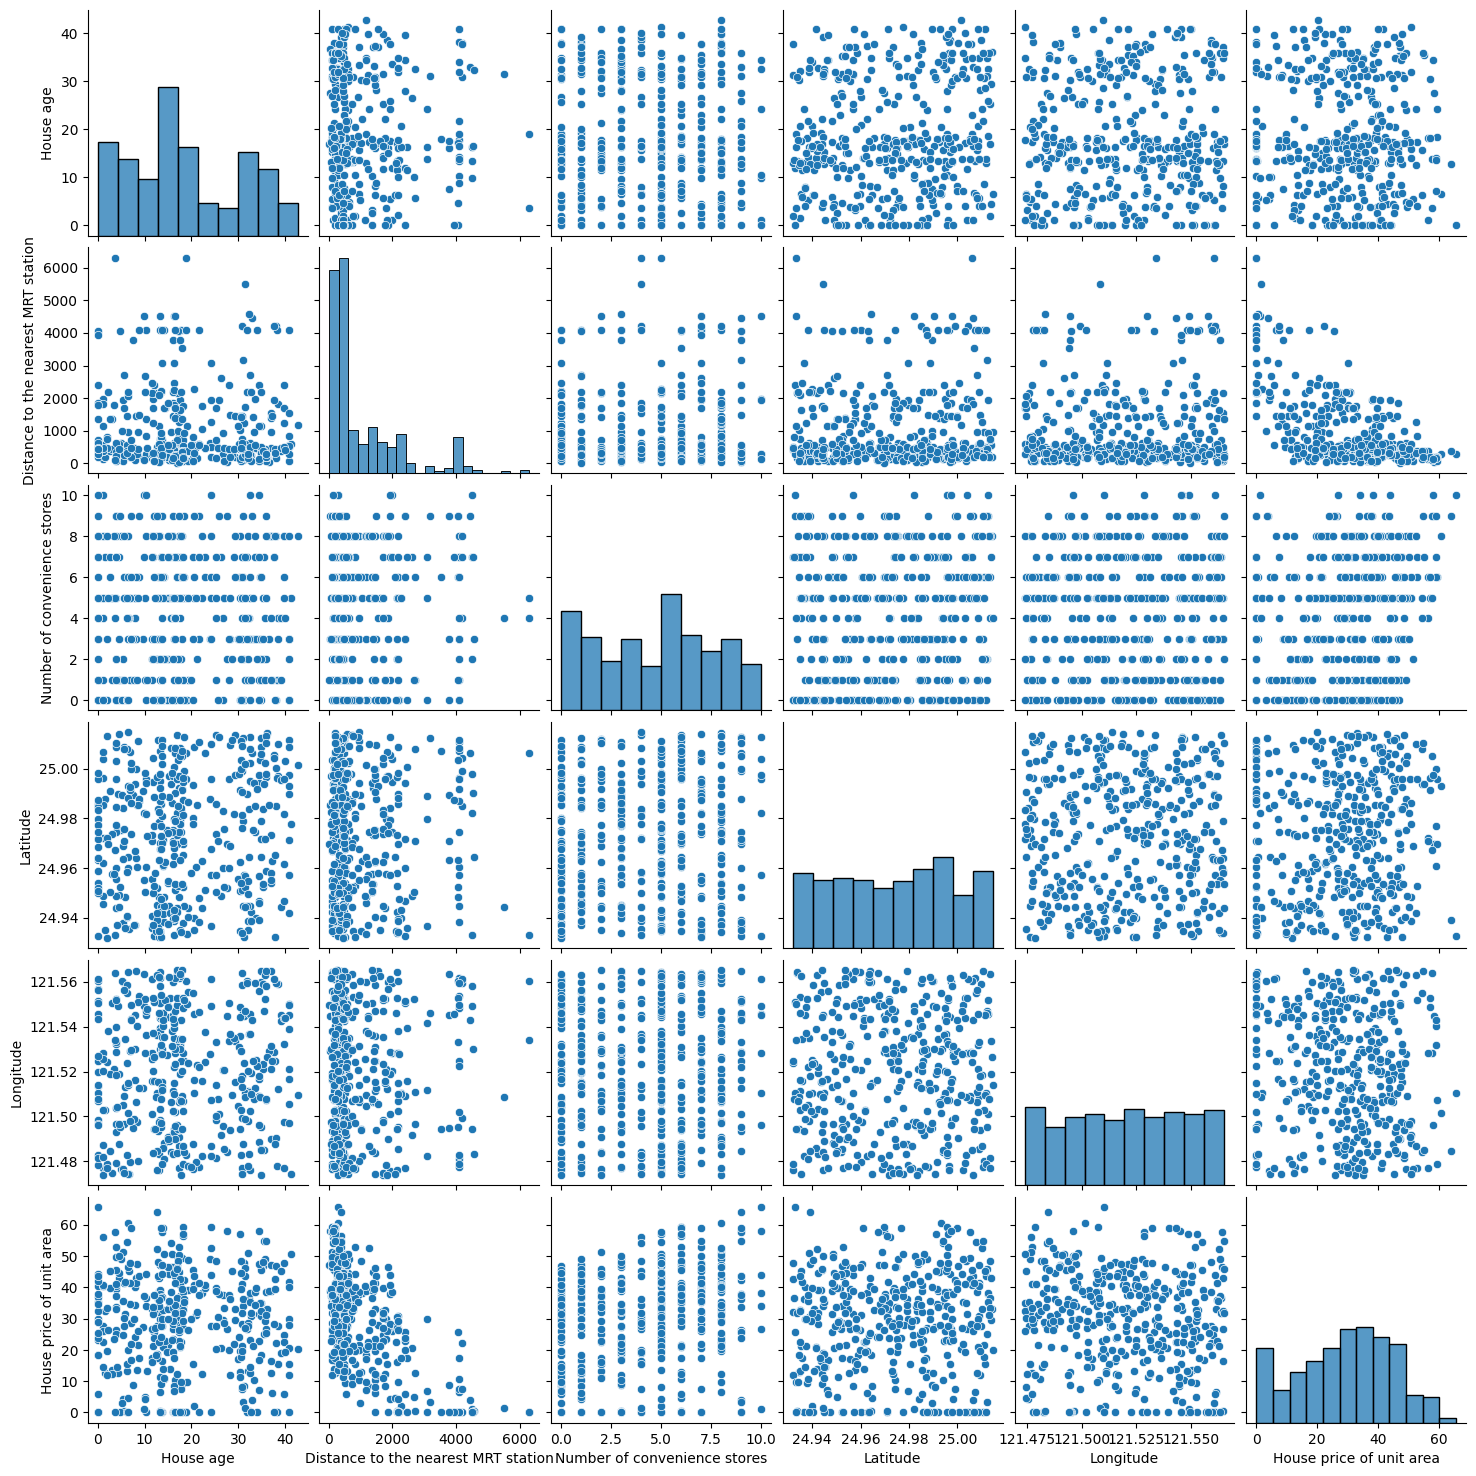

In [ ]:
sns.pairplot(df1)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

                               feature           VIF
0                            House age  3.495719e+00
1  Distance to the nearest MRT station  1.802904e+00
2         Number of convenience stores  3.233093e+00
3                             Latitude  1.036750e+06
4                            Longitude  1.036172e+06


In [ ]:
print(x.columns)

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize and train the model

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions
y_pred = dt_model.predict(x_test)

# Evaluate performance
print("Decision Tree R2 Score:", r2_score(y_test, y_pred))


Decision Tree R2 Score: 0.193622485043923


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate performance
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest R2 Score: 0.5171344582236858


In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.42095368,  0.8973456 , -0.43313285, -1.63507092,  1.70762426],
       [ 0.07616215, -0.80554937,  0.28370201,  0.55829294, -1.57139782],
       [-0.42095368, -0.64931362, -0.79155027,  0.91530007,  0.9242065 ],
       ...,
       [ 1.01983964, -0.5127449 , -1.50838513, -0.9238941 ,  0.94994978],
       [ 0.14356768, -0.4230818 , -1.1499677 , -0.62204248, -1.60010608],
       [ 1.39899578,  0.92859994,  0.64211944,  1.49365467, -1.28440316]])

In [ ]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_test = model.predict(x_test_scaled)

In [ ]:
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)

In [ ]:
print("R-squared:", r2_test)
print("Root Mean Squared Error:", rmse_test)

R-squared: 0.5495657614291127
Root Mean Squared Error: 11.162843441979852


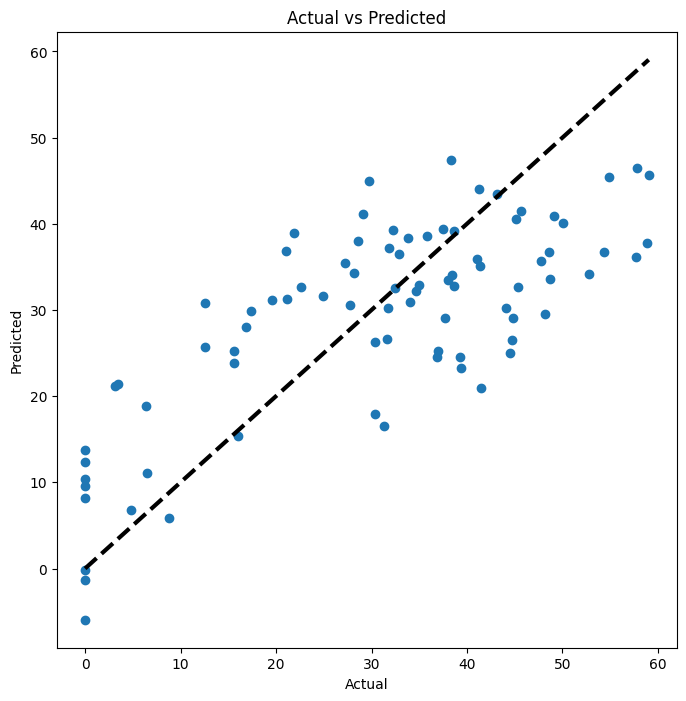

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter (y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
model.intercept_

28.75831387077685

In [ ]:
model.coef_

array([  0.01484447, -10.08750227,   5.06902708,   1.54554389,
        -0.95199227])

In [ ]:
model.score(x_train_scaled,y_train)

0.5101522047461005

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

lm=LinearRegression()
lm.fit(x_train, y_train)
cv=cross_val_score(lm, x_train,y_train,cv=5)
print('LinearRegression')
print(mean(cv))

LinearRegression
0.49229679402256055


In [ ]:
rf=RandomForestRegressor(random_state = 1)
rf.fit(x_train, y_train)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)
print('Random Forest Regressor')
print(mean (cv))

Random Forest Regressor
0.4007711810254878


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)
r2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)
print("R2 Score : ",r2_score_dtr,"%")

R2 Score :  7.57 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_score_rf = round(r2_score(y_pred_rf,y_test) * 100, 2)
print('R2 Score : ',r2_score_rf,'%')

R2 Score :  0.3 %
